In [1]:
pip install nltk matplotlib seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import os
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Ensure that plots show inline
%matplotlib inline

# Download necessary NLTK tokenizer data (run only once)
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def process_file(file_path):
    """
    Reads a text file, removes Gutenberg boilerplate (header and footer), tokenizes the text,
    converts tokens to lowercase, and filters out non-alphabetic tokens.
    
    Returns:
        tokens (list): A list of cleaned, alphabetic tokens.
    """
    # Read the file assuming UTF-8 encoding
    with open(file_path, "r", encoding="utf-8") as f:
        raw_text = f.read()
    
    # Define common Gutenberg markers
    start_marker = "*** START OF THIS PROJECT GUTENBERG EBOOK"
    end_marker   = "*** END OF THIS PROJECT GUTENBERG EBOOK"
    
    # Find the start of the content
    start_idx = raw_text.find(start_marker)
    if start_idx != -1:
        # Start after the marker (you can adjust offset if needed)
        text = raw_text[start_idx + len(start_marker):]
    else:
        text = raw_text  # If no marker found, use entire text
    
    # Find the end marker and cut the text
    end_idx = text.find(end_marker)
    if end_idx != -1:
        text = text[:end_idx]
    
    # Remove extra whitespace
    text = text.strip()
    
    # Tokenize the text into words and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Keep only alphabetic tokens (remove punctuation, numbers, etc.)
    tokens = [token for token in tokens if token.isalpha()]
    
    return tokens

# Quick test on one file (adjust the path if needed)
test_file = os.path.join("Gutenberg_Books", "1.txt.txt")
print("Test file tokens (first 20):", process_file(test_file)[:20])


Test file tokens (first 20): ['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'note', 'this', 'file', 'combines', 'the', 'first', 'two', 'project', 'gutenberg', 'files', 'both', 'of', 'which', 'were']


In [4]:
# Define the folder that contains your Gutenberg files
folder = "Gutenberg_Books"

# List all files that end with ".txt.txt" (you can adjust the filter if needed)
all_files = [f for f in os.listdir(folder) if f.endswith(".txt.txt")]
print(f"Found {len(all_files)} files.")

# Prepare an aggregated Counter and a list to store per-file stats
aggregated_counter = Counter()
file_stats = []  # This will hold stats for each file

# Process each file
for filename in all_files:
    file_path = os.path.join(folder, filename)
    tokens = process_file(file_path)
    # Update the aggregated word counter
    aggregated_counter.update(tokens)
    # Store statistics for this file
    file_stats.append({
        "filename": filename,
        "num_tokens": len(tokens),
        "unique_tokens": len(set(tokens))
    })

# Create a DataFrame for file-level statistics
df_stats = pd.DataFrame(file_stats)
print("Per-file statistics (first 5 rows):")
display(df_stats.head())


Found 2475 files.
Per-file statistics (first 5 rows):


filename  num_tokens  unique_tokens
0   4658.txt.txt      161293          15819
1  37009.txt.txt       77551           4991
2  14609.txt.txt       89507          11561
3   5342.txt.txt       87301           6824
4     17.txt.txt      268340           5539

Aggregated Top 20 words:
[('the', 13395724), ('of', 7642031), ('and', 6378760), ('to', 4934479), ('a', 3908621), ('in', 3857791), ('that', 2092342), ('is', 1800929), ('it', 1767951), ('was', 1723232), ('i', 1623000), ('he', 1620363), ('with', 1496503), ('as', 1448598), ('for', 1433725), ('his', 1393159), ('by', 1266249), ('on', 1171581), ('be', 1141795), ('not', 1094746)]


/var/folders/7j/rv3w77nj6kb6kw_ssltcqpkr0000gp/T/ipykernel_22400/2636935665.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


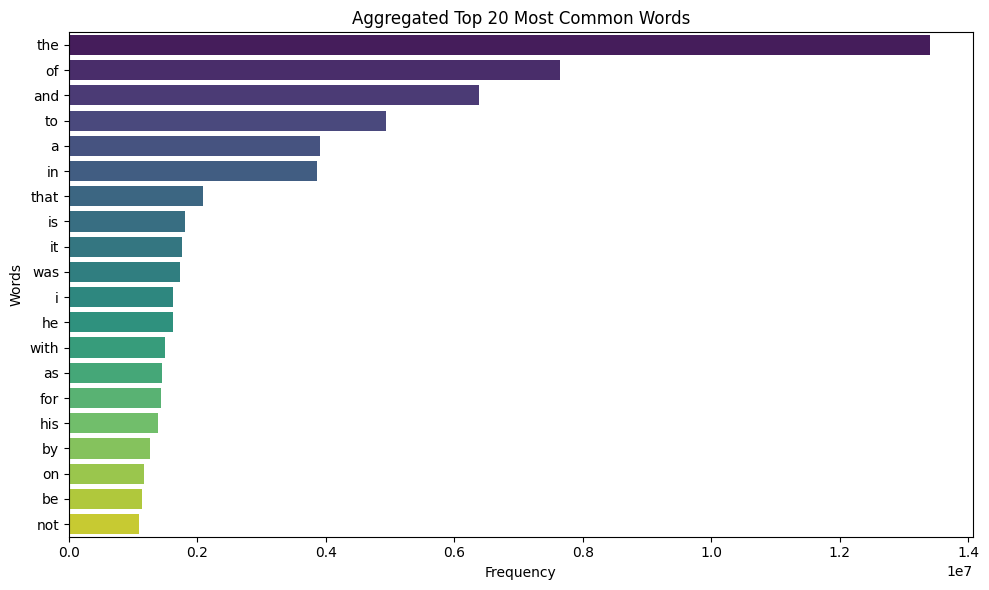

In [5]:
# Get the top 20 most common words across all files
most_common_all = aggregated_counter.most_common(20)
print("Aggregated Top 20 words:")
print(most_common_all)

# Unpack words and counts for plotting
words, counts = zip(*most_common_all)

# Plot a bar chart for the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Aggregated Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


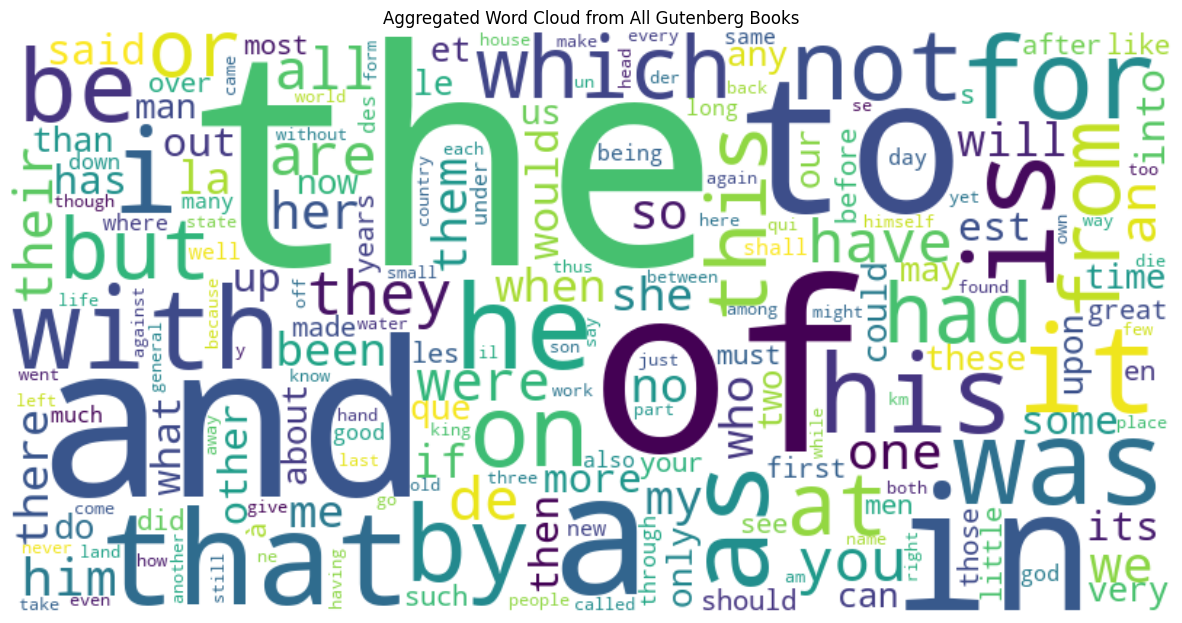

In [6]:
# Generate a word cloud from the aggregated word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(aggregated_counter)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Aggregated Word Cloud from All Gutenberg Books")
plt.show()


filename  num_tokens  unique_tokens  lexical_diversity
0   4658.txt.txt      161293          15819           0.098076
1  37009.txt.txt       77551           4991           0.064358
2  14609.txt.txt       89507          11561           0.129163
3   5342.txt.txt       87301           6824           0.078166
4     17.txt.txt      268340           5539           0.020642

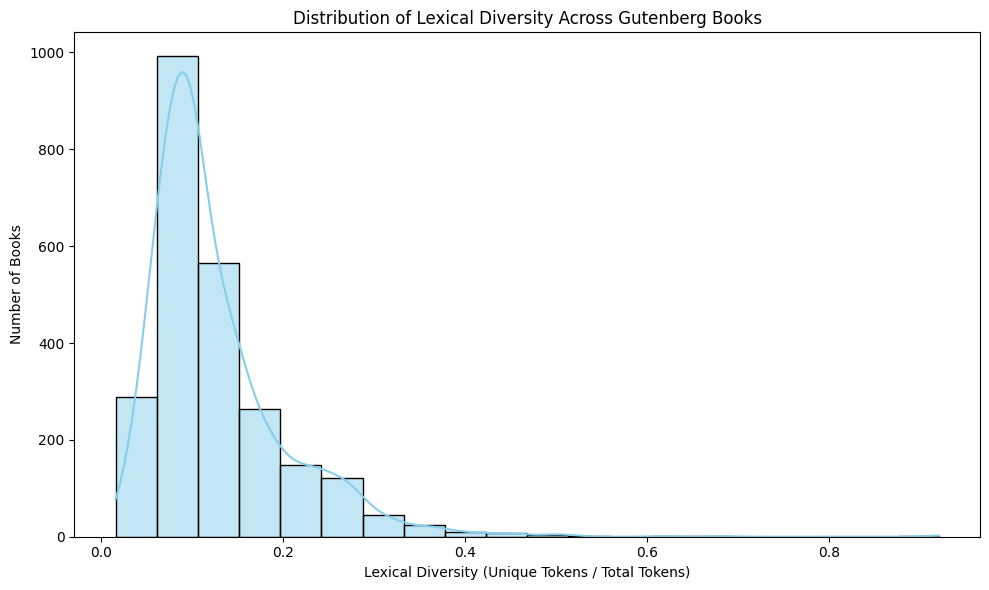

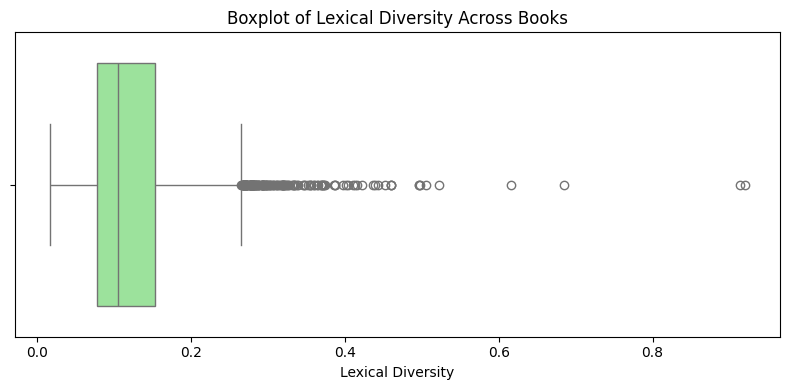

In [7]:
# Compute lexical diversity (unique tokens / total tokens) for each file
df_stats['lexical_diversity'] = df_stats['unique_tokens'] / df_stats['num_tokens']

# Display the first few rows of the updated DataFrame
display(df_stats.head())

# Plot a histogram of lexical diversity across the books
plt.figure(figsize=(10, 6))
sns.histplot(df_stats['lexical_diversity'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Lexical Diversity Across Gutenberg Books")
plt.xlabel("Lexical Diversity (Unique Tokens / Total Tokens)")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()

# Optional: Create a boxplot to check for outliers in lexical diversity
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_stats['lexical_diversity'], color='lightgreen')
plt.title("Boxplot of Lexical Diversity Across Books")
plt.xlabel("Lexical Diversity")
plt.tight_layout()
plt.show()


In [8]:
# If not already done, aggregate tokens from all files.
all_tokens = []
for filename in all_files:
    file_path = os.path.join(folder, filename)
    tokens = process_file(file_path)
    all_tokens.extend(tokens)

print("Total tokens collected from all files:", len(all_tokens))


Total tokens collected from all files: 209085770


In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:

print(nltk.data.path)
nltk.download('punkt')



['/Users/mmadhusudan/nltk_data', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/nltk_data', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/share/nltk_data', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
print(nltk.data.find('taggers/averaged_perceptron_tagger'))


/Users/mmadhusudan/nltk_data/taggers/averaged_perceptron_tagger


In [13]:
import random

# To save processing time, sample a subset of tokens (e.g., 5000 tokens) from the aggregated list.
sample_size = min(5000, len(all_tokens))
sample_tokens = random.sample(all_tokens, sample_size)



In [14]:
# Read and clean the text from one file
file_path = os.path.join("Gutenberg_Books", "1.txt.txt")
with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()

# Remove Gutenberg header and footer (example markers)
start_marker = "*** START OF THIS PROJECT GUTENBERG EBOOK"
end_marker   = "*** END OF THIS PROJECT GUTENBERG EBOOK"
start_idx = raw_text.find(start_marker)
if start_idx != -1:
    text = raw_text[start_idx + len(start_marker):]
else:
    text = raw_text

end_idx = text.find(end_marker)
if end_idx != -1:
    cleaned_text = text[:end_idx]
else:
    cleaned_text = text

cleaned_text = cleaned_text.strip()


Number of sentences: 833
Average sentence length (words): 27.613445378151262


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


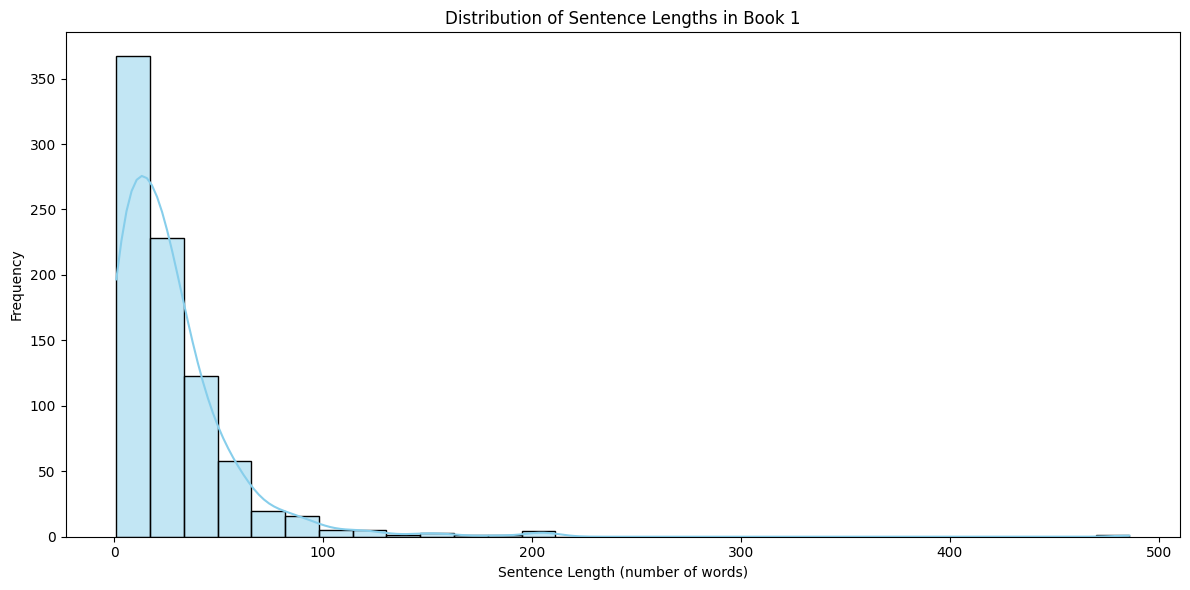

In [15]:

# --- Sentence-Level Analysis ---

# Ensure the sentence tokenizer is available
nltk.download('punkt')

# Split the cleaned text into sentences using nltk.sent_tokenize
sentences = nltk.sent_tokenize(cleaned_text)

# Calculate the length (in words) of each sentence
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]

# Display basic statistics
print("Number of sentences:", len(sentences))
print("Average sentence length (words):", sum(sentence_lengths) / len(sentence_lengths))

# Plot a histogram of sentence lengths
plt.figure(figsize=(12, 6))
sns.histplot(sentence_lengths, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sentence Lengths in Book 1")
plt.xlabel("Sentence Length (number of words)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



In [24]:
!pip install spacy
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
zsh:1: command not found: python


In [25]:
!python3 -m spacy download en_core_web_sm


/Users/mmadhusudan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Named Entity counts:


Entity Type  Count
4           ORG    429
5           GPE    205
3        PERSON    197
2          DATE    145
1      CARDINAL    114
6           LAW     67
8   WORK_OF_ART     56
0       ORDINAL     33
7          NORP     31
14      PRODUCT     18
15          LOC     16
9         MONEY     14
13        EVENT      8
12          FAC      7
16         TIME      6
11      PERCENT      5
10     QUANTITY      4
17     LANGUAGE      1

/var/folders/7j/rv3w77nj6kb6kw_ssltcqpkr0000gp/T/ipykernel_22400/556953189.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_entities.head(10), x='Count', y='Entity Type', palette="magma")


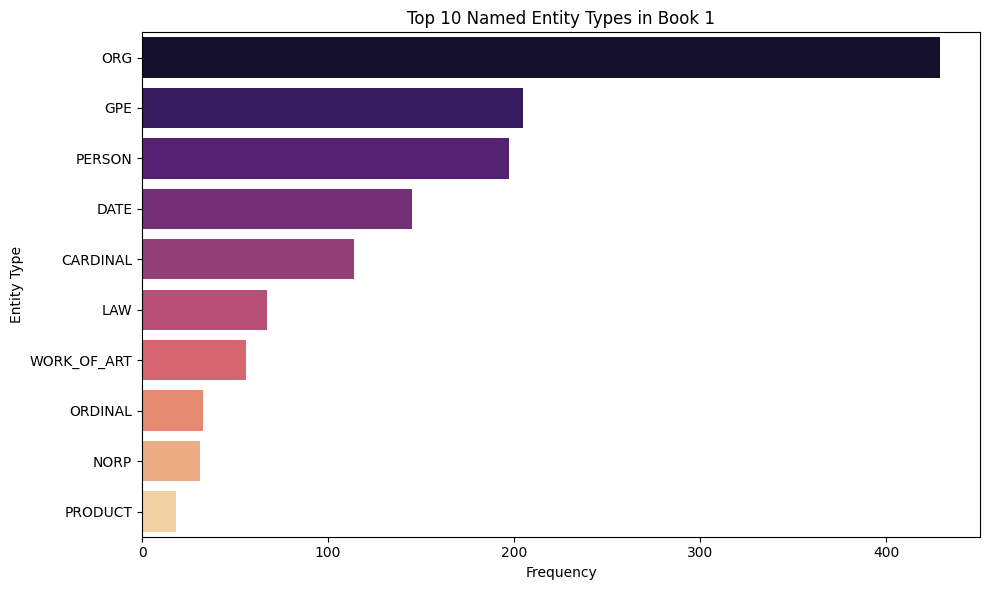

In [26]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the cleaned text from one file (if you wish to process all files, you could aggregate the text)
doc = nlp(cleaned_text)

# Extract named entities and their labels
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Count the frequency of each entity label (e.g., PERSON, ORG, GPE, etc.)
entity_counts = Counter([ent.label_ for ent in doc.ents])

# Convert counts into a DataFrame for easier visualization
df_entities = pd.DataFrame(entity_counts.items(), columns=['Entity Type', 'Count']).sort_values(by='Count', ascending=False)

print("Named Entity counts:")
display(df_entities)

# Plot a bar chart for the top 10 named entity types
plt.figure(figsize=(10, 6))
sns.barplot(data=df_entities.head(10), x='Count', y='Entity Type', palette="magma")
plt.title("Top 10 Named Entity Types in Book 1")
plt.xlabel("Frequency")
plt.ylabel("Entity Type")
plt.tight_layout()
plt.show()


Named Entity counts:


Entity Type  Count
4           ORG    429
5           GPE    205
3        PERSON    197
2          DATE    145
1      CARDINAL    114
6           LAW     67
8   WORK_OF_ART     56
0       ORDINAL     33
7          NORP     31
14      PRODUCT     18
15          LOC     16
9         MONEY     14
13        EVENT      8
12          FAC      7
16         TIME      6
11      PERCENT      5
10     QUANTITY      4
17     LANGUAGE      1

/var/folders/7j/rv3w77nj6kb6kw_ssltcqpkr0000gp/T/ipykernel_22400/556953189.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_entities.head(10), x='Count', y='Entity Type', palette="magma")


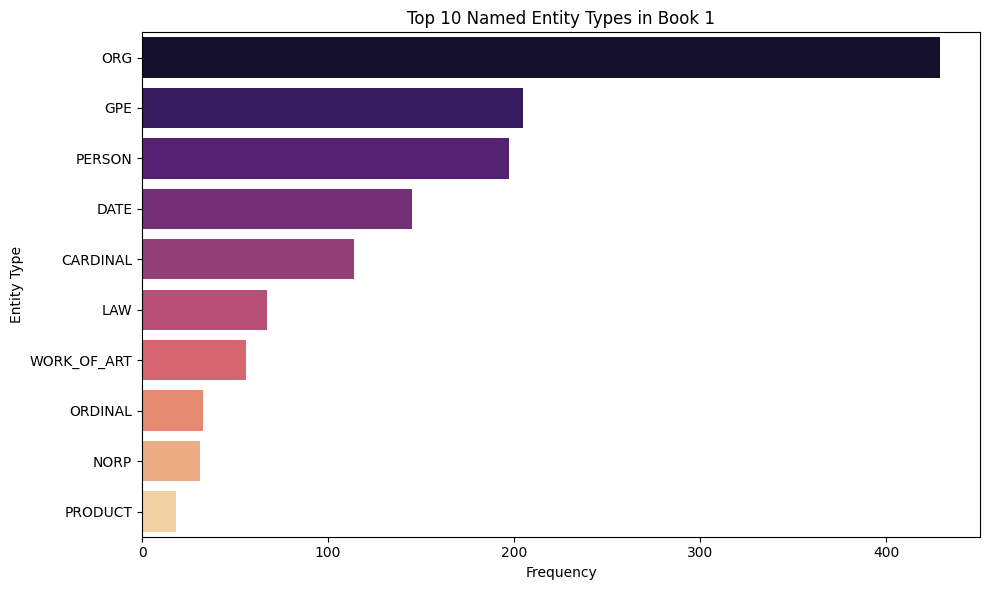

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define a function to get the cleaned raw text from a file
def get_cleaned_text(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        raw_text = f.read()
    # Define common Gutenberg markers (adjust if necessary)
    start_marker = "*** START OF THIS PROJECT GUTENBERG EBOOK"
    end_marker   = "*** END OF THIS PROJECT GUTENBERG EBOOK"
    
    start_idx = raw_text.find(start_marker)
    if start_idx != -1:
        text = raw_text[start_idx + len(start_marker):]
    else:
        text = raw_text

    end_idx = text.find(end_marker)
    if end_idx != -1:
        text = text[:end_idx]
    
    # Remove extra whitespace and return
    return text.strip()

# Build a corpus: each document is the cleaned text of one file.
corpus = []
doc_names = []  # Keep track of file names (optional)
for filename in all_files:
    file_path = os.path.join(folder, filename)
    doc = get_cleaned_text(file_path)
    corpus.append(doc)
    doc_names.append(filename)

print(f"Collected {len(corpus)} documents.")

# Use CountVectorizer to create a document-term matrix (DTM)
# We remove English stopwords; you can adjust max_df/min_df as needed.
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(corpus)
print("DTM shape:", dtm.shape)

# Fit an LDA model with a chosen number of topics (e.g., 5 topics)
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Function to display top words per topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx}: {' '.join(top_words)}")

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print("\nTop words per topic:")
print_top_words(lda_model, feature_names, n_top_words)


Collected 2475 documents.
DTM shape: (2475, 526829)

Top words per topic:
Topic #0: water small time great form species large long work used
Topic #1: said man time great men did like day good little
Topic #2: la et le les il que en des qui est
Topic #3: die der en que la und el den se los
Topic #4: est 000 km years na total male female population rate


In [30]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:00a 0:00:01


Graph has 14 nodes and 17 edges.


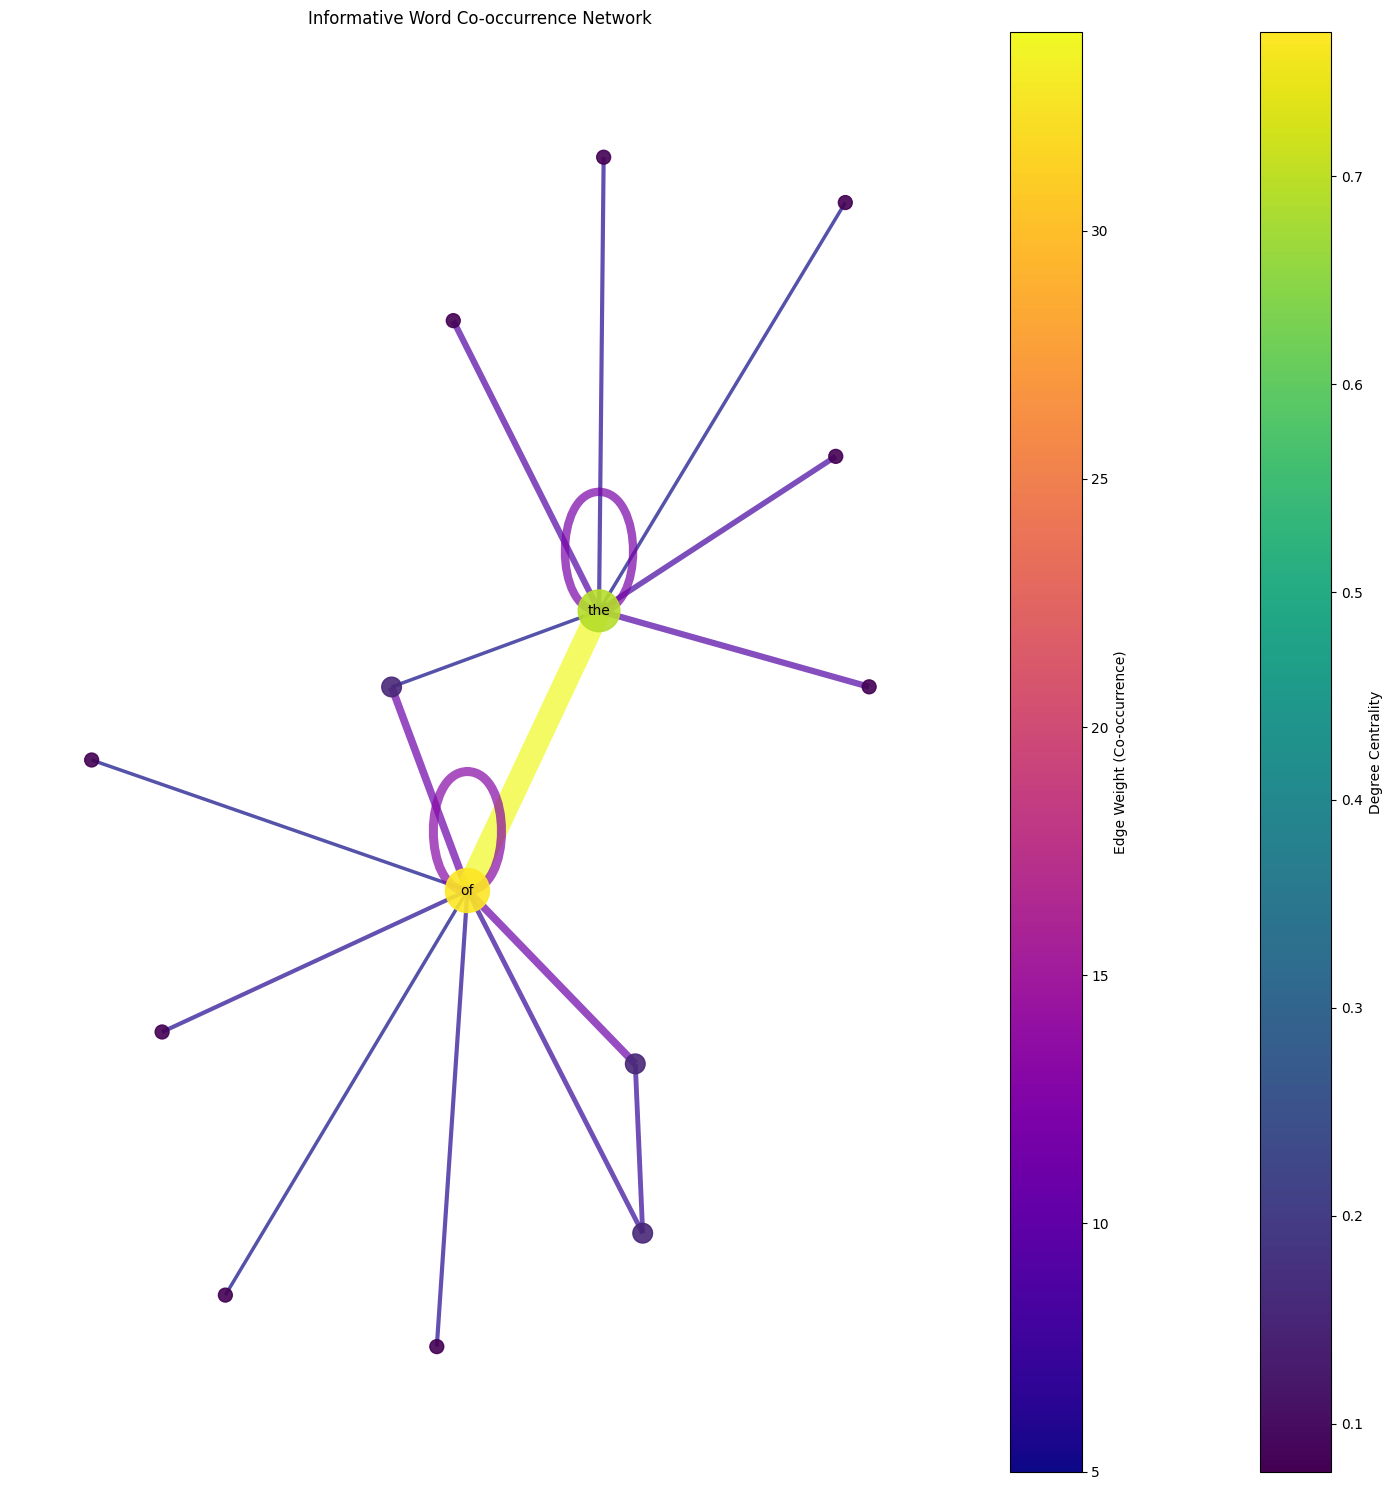

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# --- Build the Co-occurrence Network ---
window_size = 5  # Sliding window size
co_occurrence = {}

# Count co-occurrences within the window
for i, token in enumerate(tokens):
    for j in range(i+1, min(i+window_size, len(tokens))):
        pair = tuple(sorted([token, tokens[j]]))
        co_occurrence[pair] = co_occurrence.get(pair, 0) + 1

# Build the graph (only include edges with weight >= threshold)
G = nx.Graph()
threshold = 5
for pair, weight in co_occurrence.items():
    if weight >= threshold:
        G.add_edge(pair[0], pair[1], weight=weight)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# --- Compute Node and Edge Metrics ---
deg_centrality = nx.degree_centrality(G)
degrees = dict(G.degree())
node_color = [deg_centrality[node] for node in G.nodes()]
node_size = [degrees[node] * 100 for node in G.nodes()]
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_width = [w / 2 for w in edge_weights]

# --- Layout and Plotting ---
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.15, seed=42)

# Draw nodes on the axis with colors based on degree centrality
nodes = nx.draw_networkx_nodes(
    G, pos, ax=ax,
    node_size=node_size,
    node_color=node_color,
    cmap=cm.viridis,
    alpha=0.9
)

# Create a ScalarMappable for node colors and add a colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array(np.array(node_color))
fig.colorbar(sm, ax=ax, label="Degree Centrality")

# Draw edges on the same axis using edge weights
edges = nx.draw_networkx_edges(
    G, pos, ax=ax,
    width=edge_width,
    edge_color=edge_weights,
    edge_cmap=cm.plasma,
    alpha=0.7
)

# Create a ScalarMappable for edge colors and add a colorbar
ecolor = np.array(edge_weights)
sm2 = plt.cm.ScalarMappable(cmap=cm.plasma, norm=plt.Normalize(vmin=min(ecolor), vmax=max(ecolor)))
sm2.set_array(ecolor)
fig.colorbar(sm2, ax=ax, label="Edge Weight (Co-occurrence)")

# Label nodes with high centrality (top 10%)
centrality_values = np.array(list(deg_centrality.values()))
threshold_label = np.percentile(centrality_values, 90)
high_central_nodes = {node: node for node in G.nodes() if deg_centrality[node] >= threshold_label}
nx.draw_networkx_labels(G, pos, labels=high_central_nodes, font_size=10, font_color='black', ax=ax)

ax.set_title("Informative Word Co-occurrence Network")
ax.axis("off")
plt.tight_layout()
plt.show()


Number of sentences: 833
Average compound sentiment score: 0.08476578631452589


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


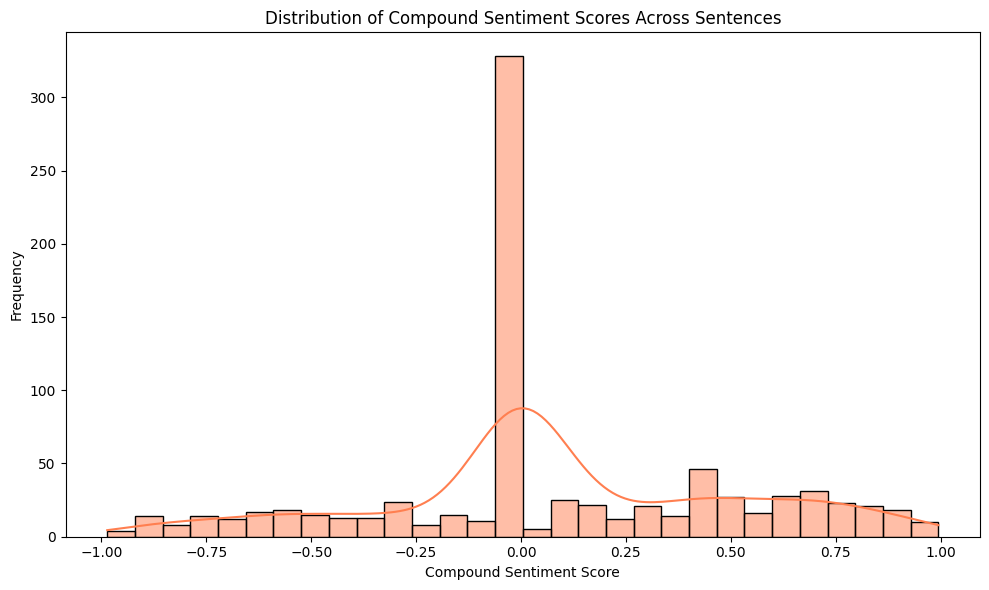

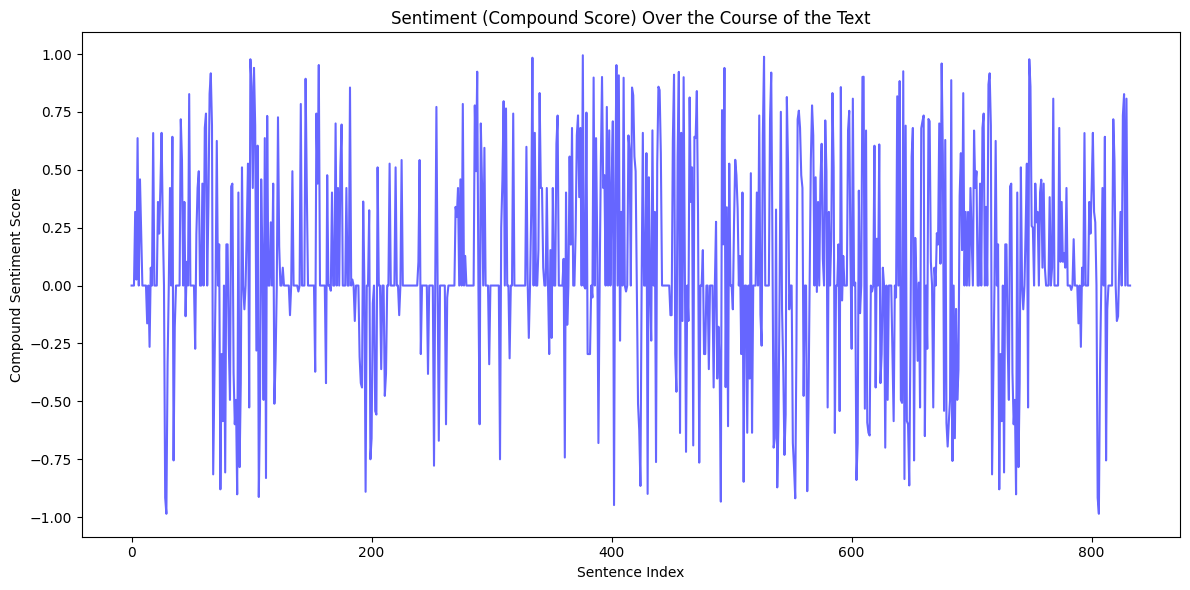

In [42]:
import nltk
# Download the VADER lexicon (run this once)
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# If you haven't already split your text into sentences, do so:
sentences = nltk.sent_tokenize(cleaned_text)

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate the compound sentiment score for each sentence
# The compound score is a normalized score between -1 (most extreme negative) and +1 (most extreme positive)
sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

# Display some basic statistics
print("Number of sentences:", len(sentences))
print("Average compound sentiment score:", sum(sentiment_scores)/len(sentiment_scores))

# --- Visualization 1: Histogram of Compound Sentiment Scores ---
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_scores, bins=30, kde=True, color='coral')
plt.title("Distribution of Compound Sentiment Scores Across Sentences")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Visualization 2: Sentiment Trend Across the Text ---
plt.figure(figsize=(12, 6))
plt.plot(sentiment_scores, color='blue', alpha=0.6)
plt.title("Sentiment (Compound Score) Over the Course of the Text")
plt.xlabel("Sentence Index")
plt.ylabel("Compound Sentiment Score")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Per-file Metrics:


file  num_tokens  num_unique  lexical_diversity  num_sentences  \
0      4658.txt.txt      161293       15819           0.098076           8086   
1     37009.txt.txt       77551        4991           0.064358           3295   
2     14609.txt.txt       89507       11561           0.129163           4501   
3      5342.txt.txt       87301        6824           0.078166           6239   
4        17.txt.txt      268340        5539           0.020642           7676   
...             ...         ...         ...                ...            ...   
2470  55836.txt.txt       57012        7572           0.132814           2200   
2471   1452.txt.txt      132776       10999           0.082839           5061   
2472  10061.txt.txt        3575        1081           0.302378            143   
2473   8395.txt.txt       18416        2276           0.123588            626   
2474  31011.txt.txt         462         230           0.497835             33   

      avg_sentence_length  avg_sentiment  
0               26.728172       0.040154  
1               27.069803       0.119815  
2               25.416130       0.013161  
3               17.282898       0.054297  
4               40.448801       0.062850  
...                   ...            ...  
2470            31.482727       0.023423  
2471            30.670223       0.032598  
2472            31.643357      -0.012249  
2473            34.236422       0.035615  
2474            18.515152       0.074618  

[2475 rows x 7 columns]

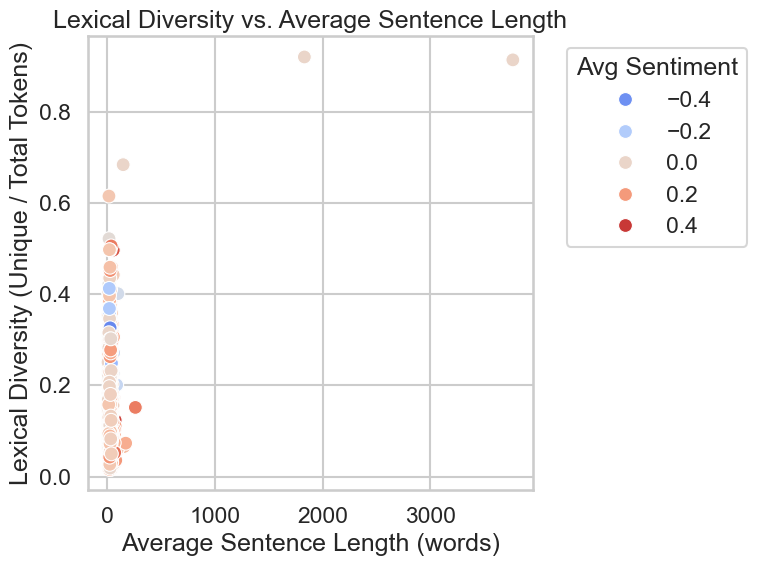

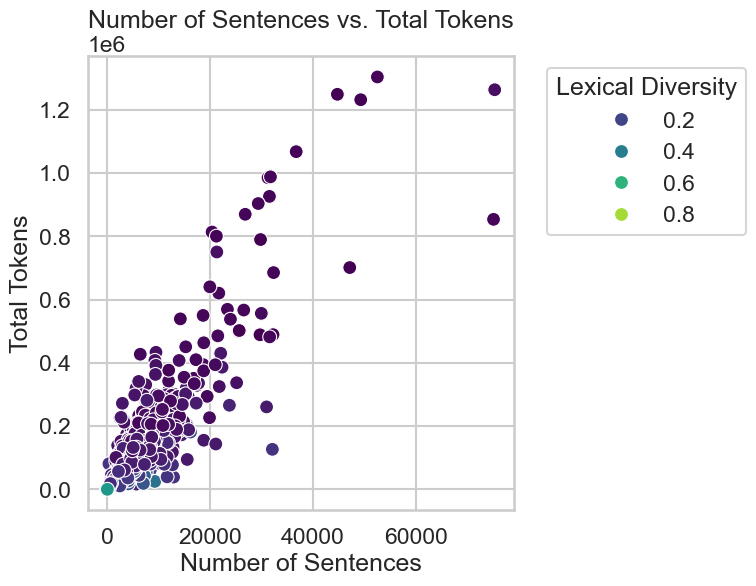

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary NLTK data is downloaded:
nltk.download('punkt')
nltk.download('vader_lexicon')

# Function to read and clean text from a file
def get_cleaned_text(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        raw_text = f.read()
    start_marker = "*** START OF THIS PROJECT GUTENBERG EBOOK"
    end_marker = "*** END OF THIS PROJECT GUTENBERG EBOOK"
    start_idx = raw_text.find(start_marker)
    if start_idx != -1:
        text = raw_text[start_idx + len(start_marker):]
    else:
        text = raw_text
    end_idx = text.find(end_marker)
    if end_idx != -1:
        text = text[:end_idx]
    return text.strip()

# Function to compute metrics for one file
def compute_file_metrics(file_path):
    text = get_cleaned_text(file_path)
    # Word-level analysis:
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    num_tokens = len(tokens)
    num_unique = len(set(tokens))
    lexical_diversity = num_unique / num_tokens if num_tokens > 0 else 0
    
    # Sentence-level analysis:
    sentences = nltk.sent_tokenize(text)
    num_sentences = len(sentences)
    sentence_lengths = [len(nltk.word_tokenize(s)) for s in sentences]
    avg_sentence_length = sum(sentence_lengths)/num_sentences if num_sentences > 0 else 0
    
    # Sentiment analysis using VADER:
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(s)['compound'] for s in sentences]
    avg_sentiment = sum(sentiment_scores)/num_sentences if num_sentences > 0 else 0
    
    return {
        'file': os.path.basename(file_path),
        'num_tokens': num_tokens,
        'num_unique': num_unique,
        'lexical_diversity': lexical_diversity,
        'num_sentences': num_sentences,
        'avg_sentence_length': avg_sentence_length,
        'avg_sentiment': avg_sentiment
    }

# Assuming your folder is "Gutenberg_Books" and all_files is defined:
folder = "Gutenberg_Books"
all_files = [f for f in os.listdir(folder) if f.endswith(".txt.txt")]

# Process all files in the folder and collect metrics
metrics_list = []
for filename in all_files:
    file_path = os.path.join(folder, filename)
    try:
        metrics = compute_file_metrics(file_path)
        metrics_list.append(metrics)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Create a DataFrame with the collected metrics
df_metrics = pd.DataFrame(metrics_list)
print("Per-file Metrics:")
display(df_metrics)

# --- Visualization 1: Lexical Diversity vs. Average Sentence Length ---
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_metrics, x='avg_sentence_length', y='lexical_diversity', 
                hue='avg_sentiment', palette='coolwarm', s=100)
plt.title("Lexical Diversity vs. Average Sentence Length")
plt.xlabel("Average Sentence Length (words)")
plt.ylabel("Lexical Diversity (Unique / Total Tokens)")
plt.legend(title='Avg Sentiment', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

# --- Visualization 2: Number of Sentences vs. Total Tokens ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_metrics, x='num_sentences', y='num_tokens', 
                hue='lexical_diversity', palette='viridis', s=100)
plt.title("Number of Sentences vs. Total Tokens")
plt.xlabel("Number of Sentences")
plt.ylabel("Total Tokens")
plt.legend(title='Lexical Diversity', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


Collected 2475 documents.
TF-IDF matrix shape: (2475, 526829)


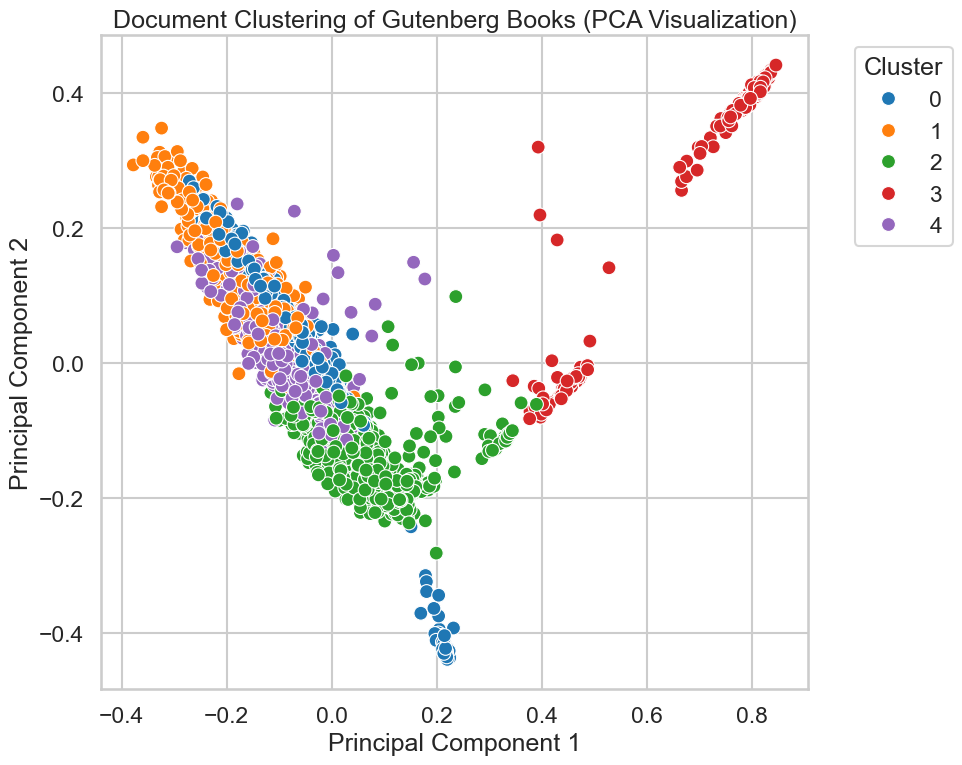

Cluster 0 (475 documents): ['5342.txt.txt', '24737.txt.txt', '36020.txt.txt', '14407.txt.txt', '7849.txt.txt', '23393.txt.txt', '24852.txt.txt', '507.txt.txt', '53372.txt.txt', '389.txt.txt', '21736.txt.txt', '6927.txt.txt', '2392.txt.txt', '28650.txt.txt', '215.txt.txt', '982.txt.txt', '173.txt.txt', '15767.txt.txt', '2770.txt.txt', '53386.txt.txt', '24025.txt.txt', '13602.txt.txt', '12116.txt.txt', '8492.txt.txt', '5817.txt.txt', '8565.txt.txt', '28572.txt.txt', '137.txt.txt', '807.txt.txt', '23672.txt.txt', '18937.txt.txt', '4633.txt.txt', '17412.txt.txt', '13646.txt.txt', '4014.txt.txt', '8914.txt.txt', '21316.txt.txt', '2756.txt.txt', '145.txt.txt', '17811.txt.txt', '155.txt.txt', '2833.txt.txt', '6879.txt.txt', '1947.txt.txt', '223.txt.txt', '17396.txt.txt', '17362.txt.txt', '2350.txt.txt', '43.txt.txt', '10607.txt.txt', '108.txt.txt', '316.txt.txt', '1872.txt.txt', '98.txt.txt', '9479.txt.txt', '16251.txt.txt', '11171.txt.txt', '35993.txt.txt', '2735.txt.txt', '24108.txt.txt', '

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# --- Build the Corpus from All Files ---
corpus = []
doc_names = []  # to keep track of document names

for filename in all_files:
    file_path = os.path.join(folder, filename)
    # Use the previously defined function to get cleaned text from each file
    text = get_cleaned_text(file_path)
    corpus.append(text)
    doc_names.append(filename)

print(f"Collected {len(corpus)} documents.")
    
# --- TF-IDF Vectorization ---
# Create a TF-IDF vectorizer; filtering very common and very rare terms.
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf_matrix = vectorizer.fit_transform(corpus)
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# --- Document Clustering with KMeans ---
k = 5  # choose the number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)
    
# --- Dimensionality Reduction using PCA for Visualization ---
pca = PCA(n_components=2, random_state=42)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for visualization
df_plot = pd.DataFrame({
    'PC1': tfidf_pca[:, 0],
    'PC2': tfidf_pca[:, 1],
    'Cluster': clusters,
    'Document': doc_names
})

# --- Visualization: Scatter Plot of Documents ---
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=100, legend='full')
plt.title("Document Clustering of Gutenberg Books (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

# --- Print Cluster Assignments ---
for i in range(k):
    docs_in_cluster = df_plot[df_plot['Cluster'] == i]['Document'].tolist()
    print(f"Cluster {i} ({len(docs_in_cluster)} documents): {docs_in_cluster}")


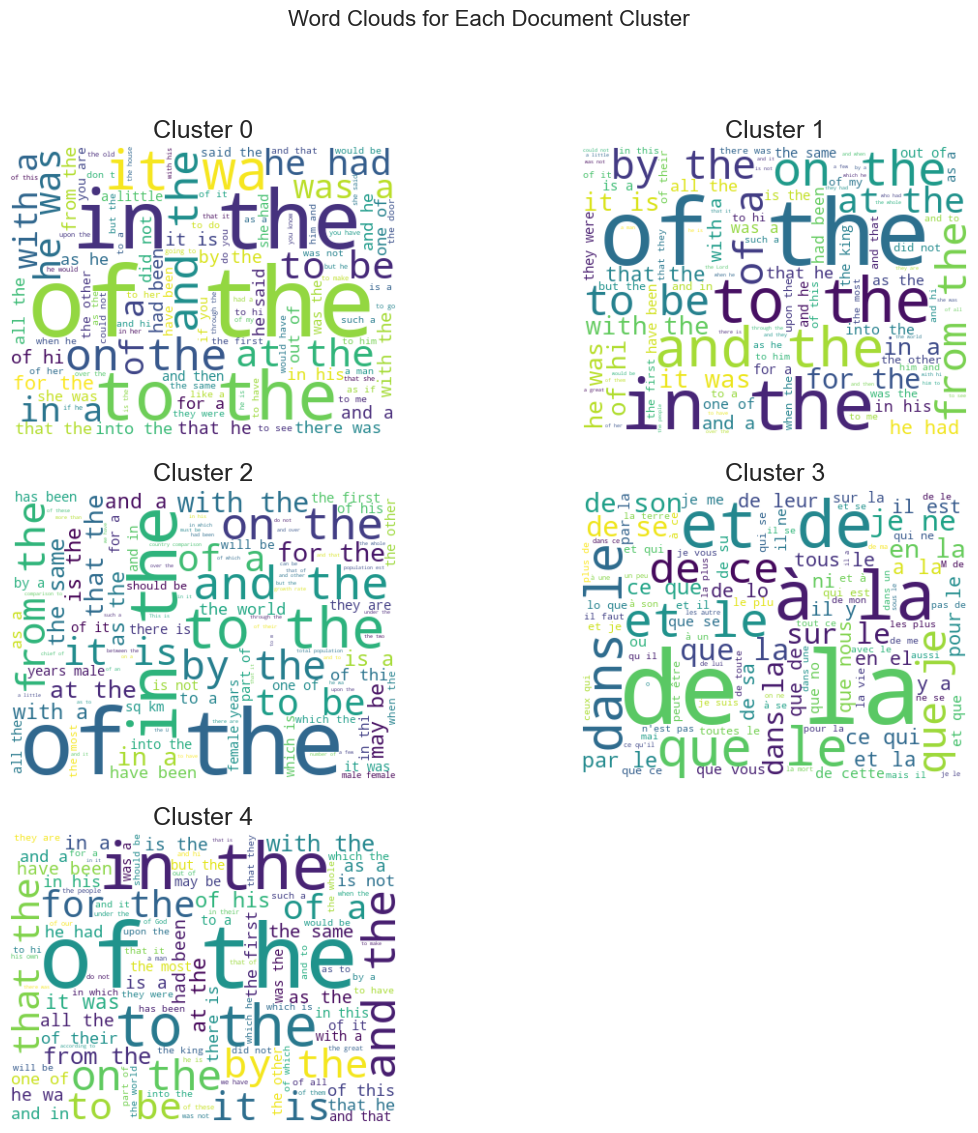

In [45]:
import math
from wordcloud import WordCloud

# --- Generate Word Clouds for Each Cluster ---
# First, aggregate the texts for each cluster into one large string per cluster.
cluster_texts = {i: "" for i in range(k)}
for text, cluster in zip(corpus, clusters):
    cluster_texts[cluster] += " " + text

# Determine the grid size for subplots; we'll use 2 columns.
cols = 2
rows = math.ceil(k / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axs = axs.flatten()  # Flatten the axes array for easy iteration

for i in range(k):
    # Create a WordCloud object (you can adjust parameters as needed)
    wc = WordCloud(stopwords='english', background_color='white',
                   max_words=100, width=400, height=300)
    wc.generate(cluster_texts[i])
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis("off")
    axs[i].set_title(f"Cluster {i}")

# Remove any extra subplots (if the grid has more cells than clusters)
for j in range(k, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Word Clouds for Each Document Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

print("Topic Modeling for each Cluster:")

# For each cluster, process the aggregated text and perform topic modeling.
for cluster_id, text in cluster_texts.items():
    print(f"\n--- Cluster {cluster_id} ---")
    
    # Split the aggregated cluster text into paragraphs based on two consecutive newlines.
    # Filter out paragraphs that are too short (e.g., less than 20 words).
    paragraphs = [para.strip() for para in text.split("\n\n") if len(para.split()) > 20]
    
    if len(paragraphs) < 5:
        print("Not enough paragraphs for robust topic modeling. Skipping this cluster.")
        continue
    
    # Create a CountVectorizer for the current cluster, ignoring English stopwords.
    vectorizer_cluster = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
    dtm_cluster = vectorizer_cluster.fit_transform(paragraphs)
    
    # Choose the number of topics for this cluster; here we use 2 topics (adjust as needed)
    n_topics_cluster = 2
    lda_cluster = LatentDirichletAllocation(n_components=n_topics_cluster, random_state=42)
    lda_cluster.fit(dtm_cluster)
    
    feature_names = vectorizer_cluster.get_feature_names_out()
    # For each topic, print the top 10 words
    for topic_idx, topic in enumerate(lda_cluster.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")


Topic Modeling for each Cluster:

--- Cluster 0 ---
Topic 0: die, der, und, den, zu, von, das, des, dem, sie
Topic 1: said, man, little, like, time, did, know, mr, good, old

--- Cluster 1 ---
Topic 0: thou, said, god, shall, thy, man, thee, king, did, lord
Topic 1: time, little, great, man, day, like, old, men, long, came

--- Cluster 2 ---
Topic 0: est, 000, party, years, male, female, 00, 15, km, president
Topic 1: di, time, water, great, en, little, la, like, work, small

--- Cluster 3 ---
Topic 0: et, la, le, les, que, il, en, des, qui, est
Topic 1: que, la, el, en, se, los, por, las, su, del

--- Cluster 4 ---
Topic 0: man, god, life, men, time, great, shall, good, world, things
Topic 1: great, time, war, general, king, men, new, government, country, years


In [49]:
!pip install gensim
!pip install usd-core

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 2.4 MB/s eta 0:00:0000:0100:01


In [51]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [55]:
!pip install --upgrade cython gensim
!pip install --force-reinstall gensim



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached gensim-4.3.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (8.3 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp39-cp39-macosx_11_0_arm64.whl (24.0 MB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp39-cp39-macosx_11_0_arm64.whl (38 kB)
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt

In [63]:
!pip install --upgrade pip setuptools wheel
!pip install gensim==4.3.0



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 2.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 6.7 MB/s eta 0:00:00 0:00:01
  Created wheel for gensim: filename=gensim-4.3.0-cp39-cp39-macosx_10_9_universal2.whl size=24457501 sha256=bd02df765d212a4a856c85b33fe883236359b773ef620d627b39b6d70071d13c
  Stored in directory: /Users/mmadhusudan/Library/Caches/pip/wheels/f4/88/4d/7bef8c2e7a9e0bd4d8882e33aea52c9c577a1f94a362290191
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl 

In [71]:
!python3 -m spacy download en_core_web_md



9442.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/Users/mmadhusudan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 8.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mmadhusudan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common tokens: ['shall', 'states', 'project', 'united', 'gutenberg', 'state', 'people', 'time', 'law', 'constitution', 'laws', 'congress', 'government', 'president', 'right', 'new', 'war', 'public', 'house', 'union', 'free', 'power', 'ebook', 'person', 'let', 'section', 'years', 'cases', 'world', 'form', 'case', 'god', 'office', 'peace', 'hope', 'small', 'money', 'rights', 'december', 'great', 'citizens', 'ebooks', 'print', 'powers', 'consent', 'representatives', 'senate', 'long', 'provide', 'declaration']


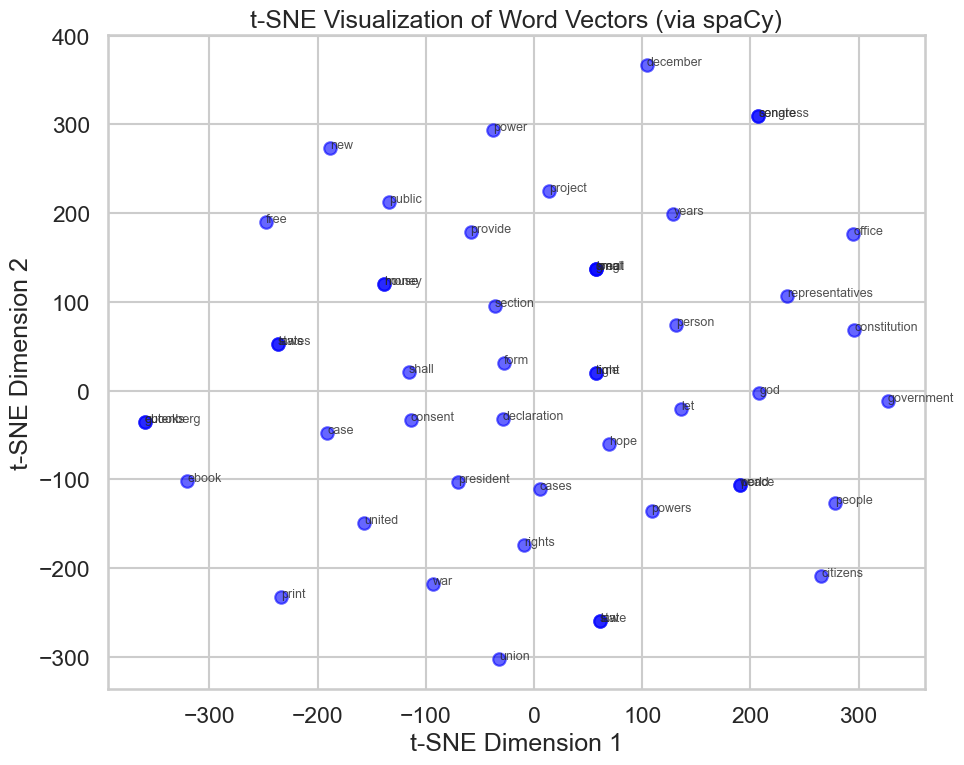

In [72]:
import spacy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import nltk
from collections import Counter

# Ensure NLTK's punkt data is available
nltk.download('punkt')

# Load spaCy's medium English model (which has pre-trained word vectors)
nlp = spacy.load("en_core_web_md")

# Assume 'cleaned_text' contains the cleaned text from one Gutenberg file
# If not already defined, you can load and clean your text as done in previous cells.
# For example:
# with open("Gutenberg_Books/1.txt.txt", "r", encoding="utf-8") as f:
#     raw_text = f.read()
# ... (cleaning steps) ...
# cleaned_text = (your cleaned text)

# Process the cleaned text with spaCy
doc = nlp(cleaned_text)

# Create a list of tokens:
# - Convert to lowercase
# - Keep only alphabetic tokens
# - Exclude stopwords
# - Only include tokens that have a non-zero vector
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop and token.has_vector]

# Count token frequencies
freq = Counter(tokens)

# Select the 50 most common tokens that have vectors
most_common_tokens = [word for word, count in freq.most_common(50)]
print("Most common tokens:", most_common_tokens)

# Get the vector for each token from spaCy's vocabulary
word_vectors = np.array([nlp.vocab[word].vector for word in most_common_tokens])

# Use t-SNE to reduce the embeddings to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(word_vectors)

# Plot the t-SNE result with word annotations
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], color='blue', alpha=0.6)
for i, word in enumerate(most_common_tokens):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.8)
plt.title("t-SNE Visualization of Word Vectors (via spaCy)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.tight_layout()
plt.show()


Collected 2475 documents.
TF-IDF matrix shape: (2475, 526829)


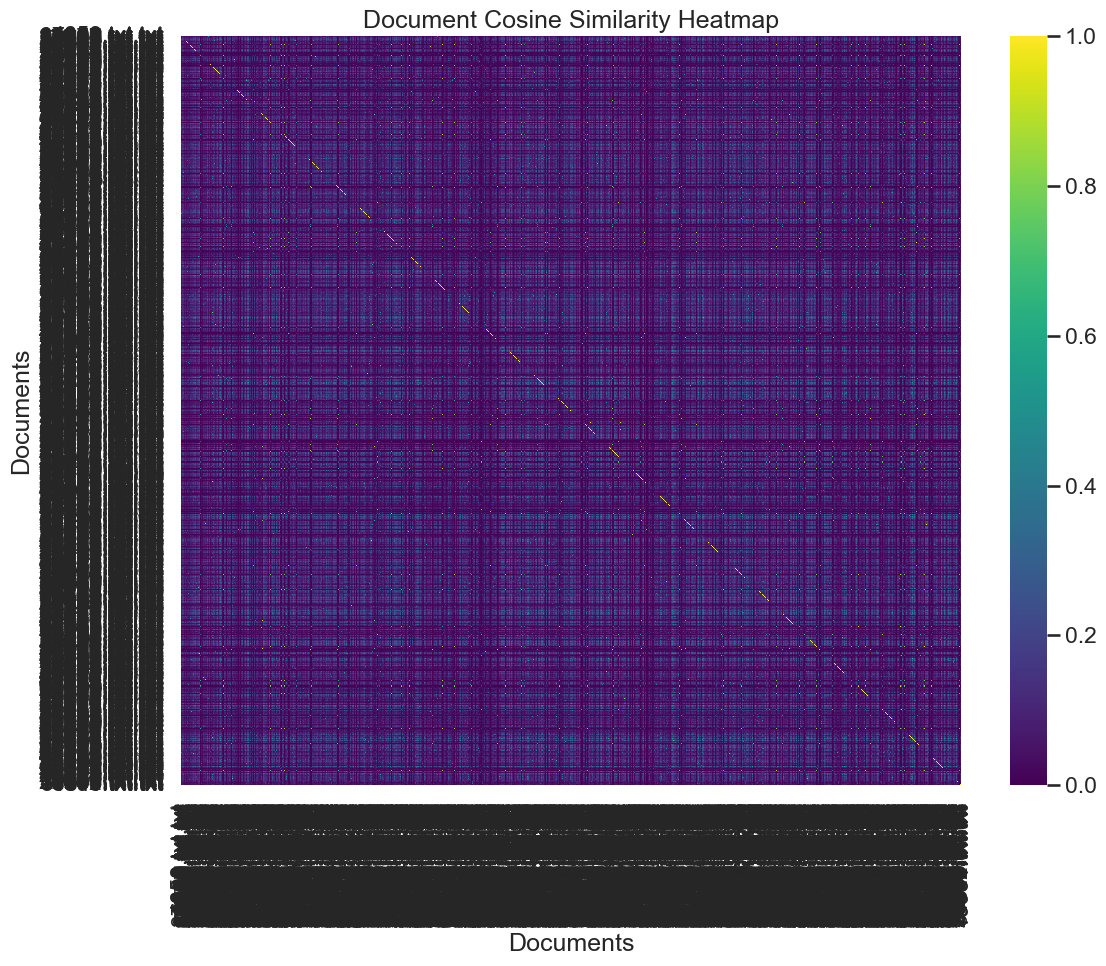

In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to read and clean text from a Gutenberg file.
def get_cleaned_text(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        raw_text = f.read()
    # Use common markers to strip Gutenberg header and footer.
    start_marker = "*** START OF THIS PROJECT GUTENBERG EBOOK"
    end_marker = "*** END OF THIS PROJECT GUTENBERG EBOOK"
    start_idx = raw_text.find(start_marker)
    if start_idx != -1:
        text = raw_text[start_idx + len(start_marker):]
    else:
        text = raw_text
    end_idx = text.find(end_marker)
    if end_idx != -1:
        text = text[:end_idx]
    return text.strip()

# Define your folder and list of files (files ending with ".txt.txt")
folder = "Gutenberg_Books"
all_files = [f for f in os.listdir(folder) if f.endswith(".txt.txt")]

# Build the corpus: each document is the cleaned text of one file.
corpus = []
doc_names = []
for filename in all_files:
    file_path = os.path.join(folder, filename)
    try:
        text = get_cleaned_text(file_path)
        corpus.append(text)
        doc_names.append(filename)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

print(f"Collected {len(corpus)} documents.")

# --- TF-IDF Vectorization ---
# Create a TF-IDF vectorizer that removes English stopwords and filters out terms that are too common or too rare.
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf_matrix = vectorizer.fit_transform(corpus)
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# --- Compute Cosine Similarity ---
# Calculate the cosine similarity matrix between documents.
cos_sim_matrix = cosine_similarity(tfidf_matrix)

# Create a DataFrame for the cosine similarity matrix using document names as indices and columns.
df_sim = pd.DataFrame(cos_sim_matrix, index=doc_names, columns=doc_names)

# --- Visualization: Document Similarity Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(df_sim, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Document Cosine Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()


Total tokens aggregated from the corpus: 209085770
Top 20 bigrams by PMI:


bigram        PMI
0    (abgeruehrter, kugelhopf)  26.054557
104         (khandu, wangchuk)  26.054557
132           (napao, wetikoo)  26.054557
133           (ndeh, ntumazah)  26.054557
134   (nerbia, espartafilardo)  26.054557
135         (nikica, valentic)  26.054557
136   (nurzhan, subkhanberdin)  26.054557
137        (nuzas, rocabertis)  26.054557
138  (ochthodromus, wilsonius)  26.054557
139          (odjo, tankpinon)  26.054557
140        (ojasta, allikkoon)  26.054557
141         (olaudah, equiano)  26.054557
142              (orhan, ucok)  26.054557
143          (otinielu, tausi)  26.054557
144          (oudom, khattiya)  26.054557
145         (palafoxes, nuzas)  26.054557
146          (papeis, avulsos)  26.054557
147    (pastissons, giraumous)  26.054557
148            (paucás, hórás)  26.054557
149            (paucís, annís)  26.054557

/var/folders/7j/rv3w77nj6kb6kw_ssltcqpkr0000gp/T/ipykernel_22400/2160407253.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bigrams, x="PMI", y="bigram_str", palette="Blues_d")


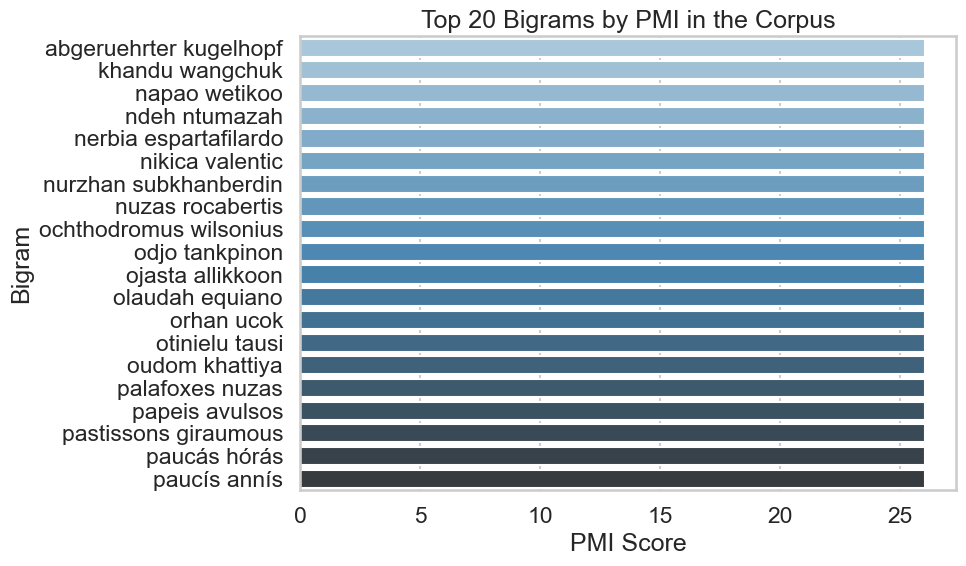

In [74]:
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Aggregate Tokens from All Documents ---
all_tokens = []
for doc in corpus:
    # Tokenize each document into words, convert to lowercase, and filter out non-alphabetic tokens.
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [token for token in tokens if token.isalpha()]
    all_tokens.extend(tokens)

print(f"Total tokens aggregated from the corpus: {len(all_tokens)}")

# --- Bigram Collocation Analysis ---
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens)

# Optionally, filter out bigrams that occur less than 3 times
finder.apply_freq_filter(3)

# Score bigrams using PMI and get the top 20 bigrams
scored_bigrams = finder.score_ngrams(bigram_measures.pmi)
# Convert to DataFrame for easy handling
df_bigrams = pd.DataFrame(scored_bigrams, columns=["bigram", "PMI"]).sort_values(by="PMI", ascending=False).head(20)
print("Top 20 bigrams by PMI:")
display(df_bigrams)

# --- Visualization ---
# Create a bar plot of the top 20 bigrams
# We'll join the tuple of words into a single string for plotting
df_bigrams["bigram_str"] = df_bigrams["bigram"].apply(lambda x: " ".join(x))

plt.figure(figsize=(10, 6))
sns.barplot(data=df_bigrams, x="PMI", y="bigram_str", palette="Blues_d")
plt.xlabel("PMI Score")
plt.ylabel("Bigram")
plt.title("Top 20 Bigrams by PMI in the Corpus")
plt.tight_layout()
plt.show()
